In [1]:
%matplotlib inline
import numpy as np
import glob
import os
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
#plt.rcParams['savefig.dpi'] = 300

#plt.rcParams['figure.autolayout'] = True
#plt.rcParams['figure.figsize'] = 2, 1.5
#plt.rcParams['axes.labelsize'] = 18
#plt.rcParams['axes.titlesize'] = 20
#plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 1.0
#plt.rcParams['lines.markersize'] = 8
#plt.rcParams['legend.fontsize'] = 14

#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

def figsize(scale):
    fig_width_pt = 345.                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "text.fontsize": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

def newfig(width):
    plt.clf()
    fig = plt.figure(figsize=figsize(width))
    ax = fig.add_subplot(111)
    return fig, ax

import seaborn as sns
sns.set(style='ticks', palette='Set2')


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


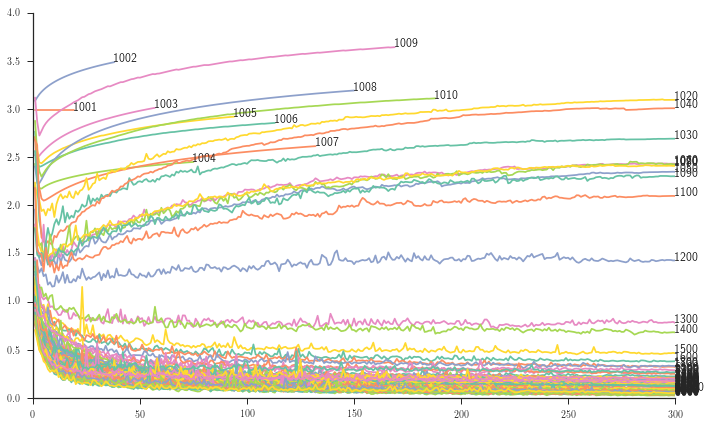

In [2]:
#points = np.array([(1, 1), (-1, 1), (1, -1), (-1, -1)])
rootdir='../../tomdata/'

fig, ax = newfig(2)

for infile in sorted(glob.glob( os.path.join(rootdir, 'result_fc_*.csv'))):
    #get network size from name
    match=re.match('^result_(.*)_(\d+)', os.path.basename(infile))
    if match:
        #labelname = match.group(1)+' '+match.group(2)
        labelname=match.group(2)
        data = np.genfromtxt(infile, delimiter=',', names=True)
        plt.plot(data['epoch'], data['validationmainloss'], label=labelname)
        ax.annotate(labelname, xy=(data['epoch'][-1], data['validationmainloss'][-1]))
#plt.legend()
ax.axis([0,300,0,4])
#fig.show()
plt.tight_layout(.5)
sns.despine()
plt.savefig('tomplotfc.pgf')
plt.savefig('tomplotfc.pdf')


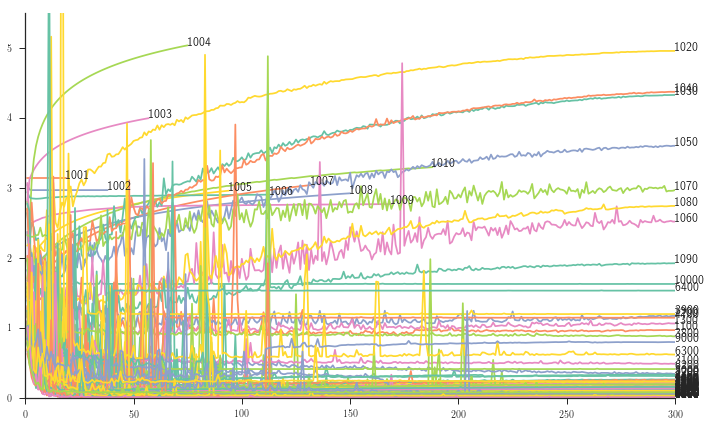

In [3]:
#points = np.array([(1, 1), (-1, 1), (1, -1), (-1, -1)])
rootdir='../../tomdata/'

fig, ax = newfig(2)

for infile in sorted(glob.glob( os.path.join(rootdir, 'result_conv_*.csv'))):
    #get network size from name
    match=re.match('^result_(.*)_(\d+)', os.path.basename(infile))
    if match:
        #labelname = match.group(1)+' '+match.group(2)
        labelname=match.group(2)
        data = np.genfromtxt(infile, delimiter=',', names=True)
        plt.plot(data['epoch'], data['validationmainloss'], label=labelname)
        ax.annotate(labelname, xy=(data['epoch'][-1], data['validationmainloss'][-1]))
#plt.legend()
ax.axis([0,300,0,5.5])
#fig.show()
plt.tight_layout(.5)
sns.despine()
plt.savefig('tomplotconv.pgf')
plt.savefig('tomplotconv.pdf')


In [4]:
#points = np.array([(1, 1), (-1, 1), (1, -1), (-1, -1)])
rootdir='../../tomdata/'

fcminvalloss = {}
fcmintrainloss = {}
fcmaxvalacc = {}
fcmaxtrainacc = {}

convminvalloss = {}
convmintrainloss = {}
convmaxvalacc = {}
convmaxtrainacc = {}


def plotdict(data, label):
    sorteddata = sorted(data.items())
    
    x = [key for (key, value) in sorteddata]
    y = [value for (key, value) in sorteddata]
    
    plt.plot(x, y, label=label)

for infile in sorted(glob.glob( os.path.join(rootdir, 'result_fc_*.csv'))):
    #get network size from name
    match=re.match('^result_(.*)_(\d+)', os.path.basename(infile))
    if match:
        nodes=int(match.group(2))
        data = np.genfromtxt(infile, delimiter=',', names=True)
        fcminvalloss[nodes] = np.min(data['validationmainloss'])
        fcmintrainloss[nodes] = np.min(data['mainloss'])
        fcmaxvalacc[nodes] = np.max(data['validationmainaccuracy'])
        fcmaxtrainacc[nodes] = np.max(data['mainaccuracy'])

for infile in sorted(glob.glob( os.path.join(rootdir, 'result_conv_*.csv'))):
    #get network size from name
    match=re.match('^result_(.*)_(\d+)', os.path.basename(infile))
    if match:
        nodes=int(match.group(2))
        data = np.genfromtxt(infile, delimiter=',', names=True)
        convminvalloss[nodes] = np.min(data['validationmainloss'])
        convmintrainloss[nodes] = np.min(data['mainloss'])
        convmaxvalacc[nodes] = np.max(data['validationmainaccuracy'])
        convmaxtrainacc[nodes] = np.max(data['mainaccuracy'])

print(len(convminvalloss))
print(sorted(convminvalloss.keys()))

108
[1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000]


('fc:', 1.0)
('conv:', 1.0)


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


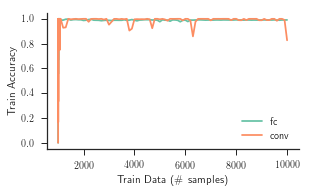

In [5]:
fig, ax = newfig(0.9)
plotdict(fcmaxtrainacc, label='fc')
plotdict(convmaxtrainacc, label='conv')
ax.set_xlabel('Train Data (\# samples)')
ax.set_ylabel('Train Accuracy')
plt.legend()
#ax.axis([0,300,0,4])
#fig.show()
plt.tight_layout(.5)
sns.despine()
fig.show()
plt.savefig('tomplotmaxtrainacc.pgf')
#plt.savefig('tomplotmaxtrainacc.pdf')
print('fc:', max(fcmaxtrainacc.values()))
print('conv:', max(convmaxtrainacc.values()))

('fc:', 0.9970238208770752)
('conv:', 1.0)


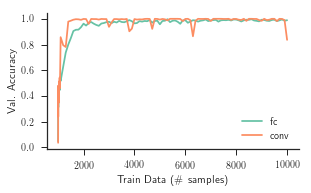

In [6]:
fig, ax = newfig(0.9)
plotdict(fcmaxvalacc, label='fc')
plotdict(convmaxvalacc, label='conv')
ax.set_xlabel('Train Data (\# samples)')
ax.set_ylabel('Val. Accuracy')
plt.legend()
#ax.axis([0,300,0,4])
#fig.show()
plt.tight_layout(.5)
sns.despine()
fig.show()
plt.savefig('tomplotmaxvalacc.pgf')
#plt.savefig('tomplotmaxvalacc.pdf')
print('fc:', max(fcmaxvalacc.values()))
print('conv:', max(convmaxvalacc.values()))

('fc:', 0.0041418075561523438)
('conv:', 0.00027204834623262286)


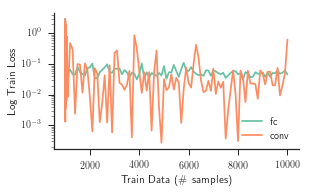

In [7]:
fig, ax = newfig(0.9)
plotdict(fcmintrainloss, label='fc')
plotdict(convmintrainloss, label='conv')
ax.set_yscale('log')
ax.set_xlabel('Train Data (\# samples)')
ax.set_ylabel('Log Train Loss')
plt.legend()
#ax.axis([0,300,0,4])
#fig.show()
plt.tight_layout(.5)
sns.despine()
fig.show()
plt.savefig('tomplotmintrainloss.pgf')
#plt.savefig('tomplotmintrainloss.pdf')
print('fc:', min(fcmintrainloss.values()))
print('conv:', min(convmintrainloss.values()))

('fc:', 0.023987006396055222)
('conv:', 0.0017381887882947922)


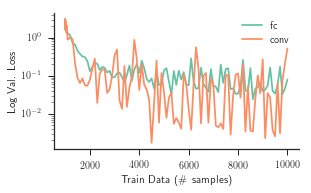

In [8]:
fig, ax = newfig(0.9)
plotdict(fcminvalloss, label='fc')
plotdict(convminvalloss, label='conv')
ax.set_yscale('log')
ax.set_xlabel('Train Data (\# samples)')
ax.set_ylabel('Log Val. Loss')
plt.legend()
#ax.axis([0,300,0,4])
#fig.show()
plt.tight_layout(.5)
sns.despine()
fig.show()
plt.savefig('tomplotminvalloss.pgf')
#plt.savefig('tomplotminvalloss.pdf')
print('fc:', min(fcminvalloss.values()))
print('conv:', min(convminvalloss.values()))